# Plotting step 4

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from ema_workbench.analysis import (prim, dimensional_stacking)
from ema_workbench import ema_logging, load_results

C:\Users\irene\anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:21: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn(
C:\Users\irene\anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "


In [12]:
experiments = pd.read_excel('./Data/experiments_st4.xlsx')
outcomes = pd.read_excel('./Data/outcomes_st4.xlsx')

In [3]:
outcomes

,Unnamed: 0,Average food provision by MF,Average vertical migration,Biomass MF 10th percentile,Final atmospheric C level,Inertia
0,0,0.021469,3.209514,7.690712,1299.614624,0.113636
1,1,0.030440,4.747004,10.184169,1363.786499,0.113636
2,2,0.022348,1.782187,9.549087,1224.918945,0.113636
3,3,0.435929,1.839704,4.634749,1505.411133,0.113636
4,4,0.361654,6.377014,10.874047,1212.824707,0.113636
...,...,...,...,...,...,...
19995,19995,0.018976,1.474649,7.830840,1215.791016,0.204545
19996,19996,0.335497,3.028207,8.865918,1195.448975,0.204545
19997,19997,0.349684,3.792538,13.001319,1361.074829,0.204545
19998,19998,0.032411,3.688401,10.084822,1045.914062,0.204545


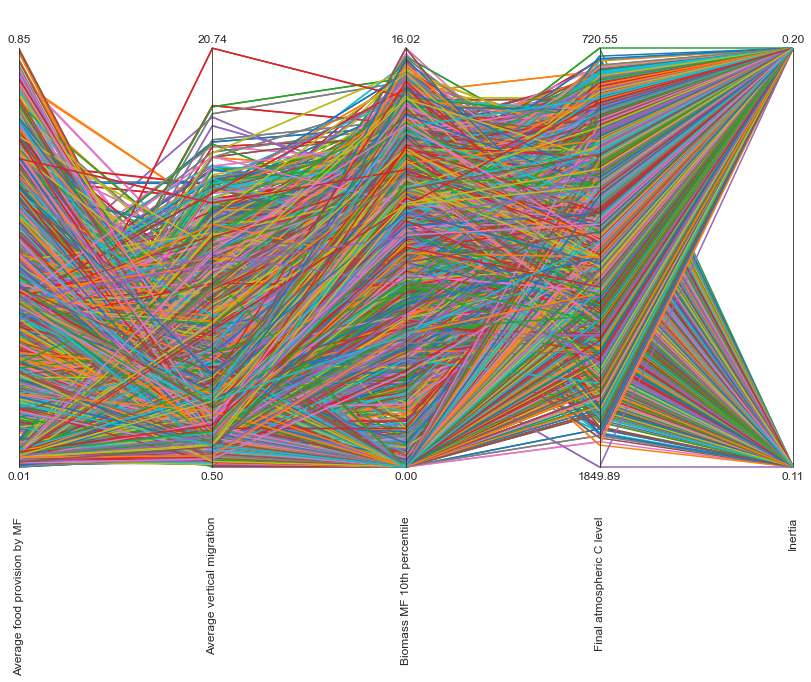

In [45]:
# plotting the results 
from ema_workbench.analysis import parcoords
data = outcomes.loc[:, ['Average food provision by MF', 'Average vertical migration', 'Biomass MF 10th percentile', 'Final atmospheric C level', 'Inertia']]

limits = parcoords.get_limits(data)
paraxes = parcoords.ParallelAxes(limits, fontsize=12)
paraxes.plot(data)
paraxes.invert_axis('Final atmospheric C level')
fig=plt.gcf()
fig.set_size_inches(12,20)
plt.savefig('./Figures/explore_st4.png')
plt.show()

# Plotting worst case for biomass

In [13]:
y = outcomes['Biomass MF 10th percentile'] < 9 

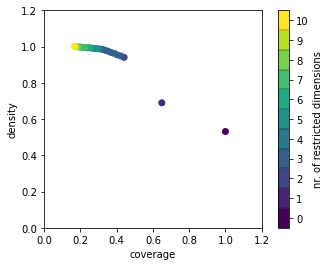

In [14]:
prim_alg = prim.Prim(experiments, y, threshold=0.8) 
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.savefig("./Figures/prim_box_7.png")
plt.show()


In [15]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.531400,0,1.00000,0.531400,0
1,0.649040,0.689800,1,0.50000,0.689800,1
2,0.441099,0.940610,2,0.24920,0.940610,2
3,0.422469,0.948458,3,0.23670,0.948458,3
4,0.403651,0.954181,4,0.22480,0.954181,3
5,0.386808,0.962763,5,0.21350,0.962763,3
6,0.369307,0.967702,6,0.20280,0.967702,3
7,0.353124,0.974299,7,0.19260,0.974299,3
8,0.337128,0.979497,8,0.18290,0.979497,3
9,0.321886,0.984744,9,0.17370,0.984744,3


coverage    0.441099
density      0.94061
id                 2
mass          0.2492
mean         0.94061
res_dim            2
Name: 2, dtype: object

                                         box 2                  
                                           min  max    qp values
Switch price change                        1.0  1.0  [-1.0, 0.0]
Switch profitability change MF fisheries   1.0  1.0  [-1.0, 0.0]



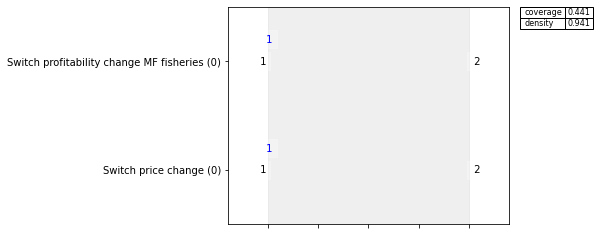

In [16]:
box1.inspect(2)
box1.inspect(2, style='graph')
plt.savefig("./Figures/prim_box_inspect.png")
plt.show()

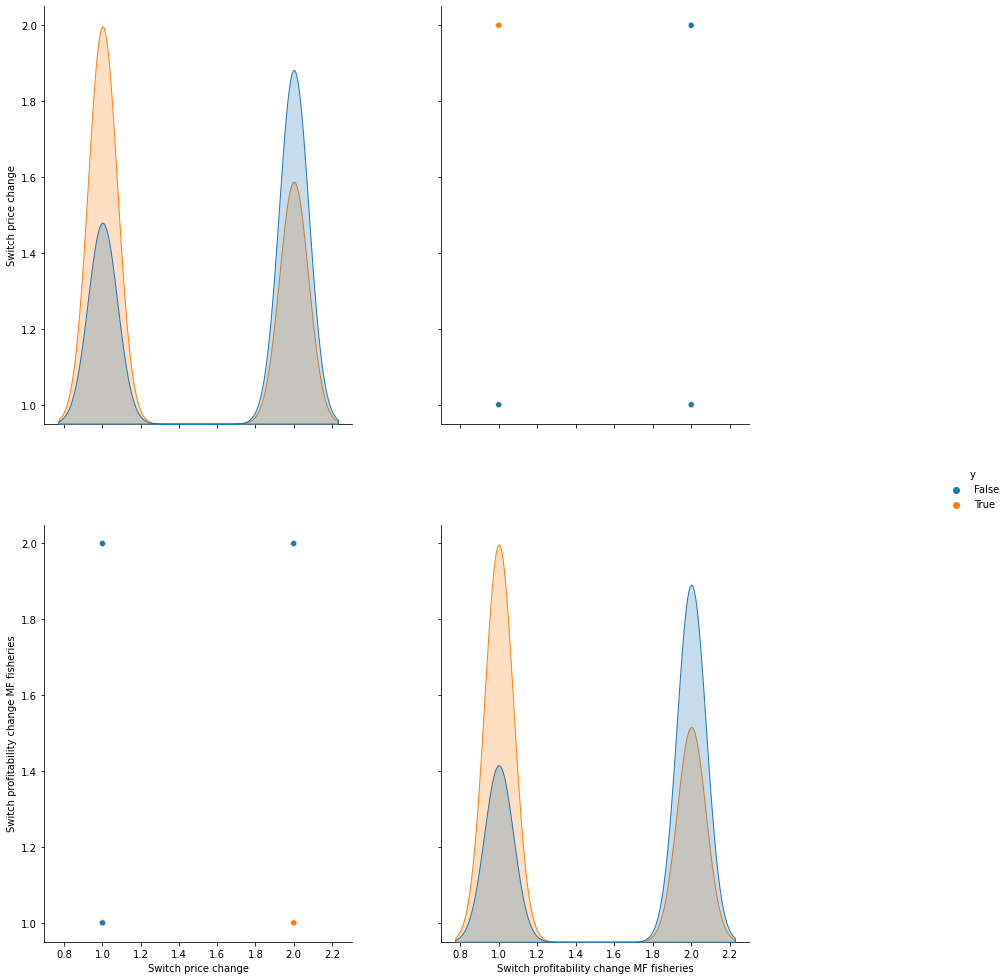

C:\Users\irene\anaconda3\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


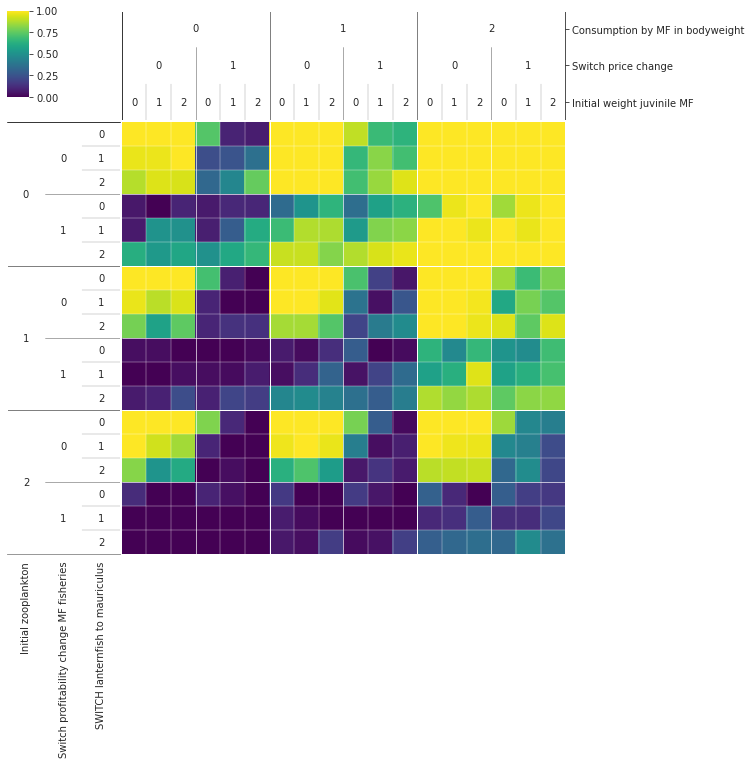

In [17]:
box1.select(2) 
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.savefig('./Figures/step_4_scatter_plot_7.png')
plt.show()

dimensional_stacking.create_pivot_plot(experiments, y)
plt.savefig('./Figures/step_4_dmn_stack_7.png', bbox_inches="tight")
plt.show()

# worst case scenario for food provision


In [21]:
y = outcomes['Average food provision by MF'] < 0.4

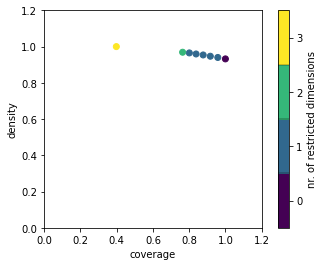

In [22]:
prim_alg = prim.Prim(experiments, y, threshold=0.8) 
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.savefig("./Figures/prim_box_food.png")
plt.show()


In [23]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.932150,0,1.0000,0.932150,0
1,0.958054,0.940053,1,0.9500,0.940053,1
2,0.916752,0.946870,2,0.9025,0.946870,1
3,0.877273,0.953867,3,0.8573,0.953867,1
4,0.838116,0.959295,4,0.8144,0.959295,1
5,0.800998,0.965163,5,0.7736,0.965163,1
6,0.763879,0.968907,6,0.7349,0.968907,2
7,0.398112,1.000000,7,0.3711,1.000000,3


coverage    0.763879
density     0.968907
id                 6
mass          0.7349
mean        0.968907
res_dim            2
Name: 6, dtype: object

                                     box 6            \
                                       min       max   
SWITCH lanternfish to mauriculus  0.400051  0.864142   
Fishmeal to fish factor           3.280354  4.799893   

                                                                 
                                                      qp values  
SWITCH lanternfish to mauriculus  [-1.0, 3.331737843108983e-73]  
Fishmeal to fish factor            [0.006386092065078326, -1.0]  



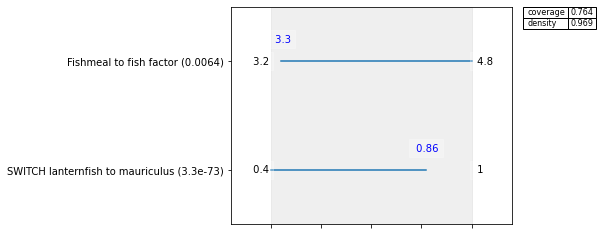

In [26]:
box1.inspect(6)
box1.inspect(6, style='graph')
plt.savefig("./Figures/prim_box_inspect_food.png")
plt.show()

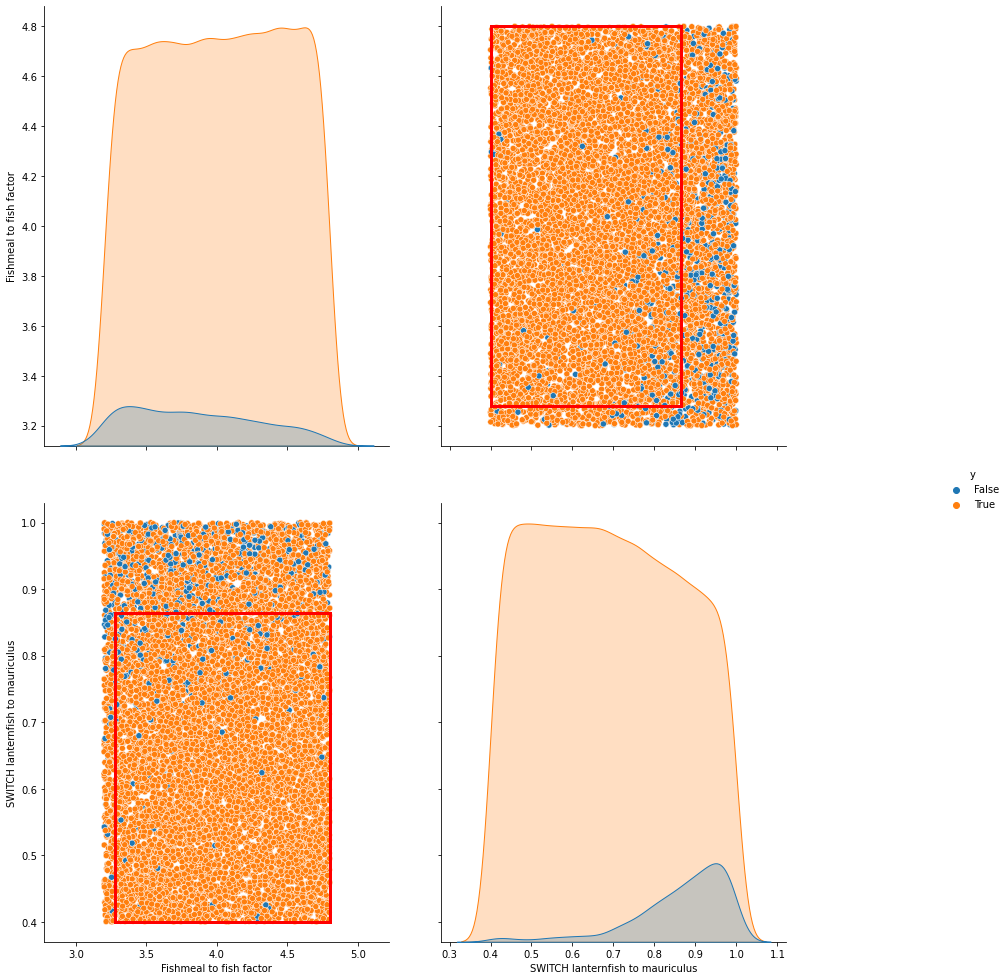

C:\Users\irene\anaconda3\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


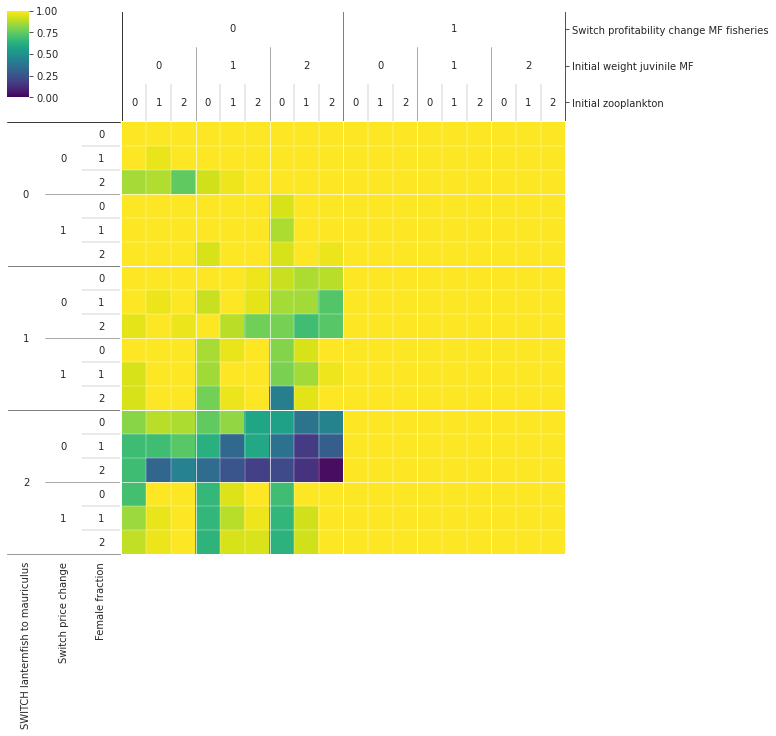

In [27]:
box1.select(6) 
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.savefig('./Figures/step_4_scatter_plot_food.png')
plt.show()

dimensional_stacking.create_pivot_plot(experiments, y) 
plt.savefig('./Figures/step_4_dmn_stack_food.png')
plt.show()

# Best case scenario carbon sequestration

In [28]:
y = outcomes['Average vertical migration'] > 3 



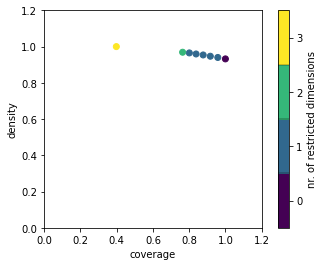

In [29]:
box1.show_tradeoff()
plt.savefig("./Figures/prim_box_vm.png")
plt.show()

In [30]:

prim_alg = prim.Prim(experiments, y, threshold=0.8) 
box1 = prim_alg.find_box()


In [31]:

box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.504600,0,1.0000,0.504600,0
1,0.815398,0.617144,1,0.6667,0.617144,1
2,0.618708,0.936413,2,0.3334,0.936413,1
3,0.593936,0.946321,3,0.3167,0.946321,2
4,0.570155,0.956449,4,0.3008,0.956449,2
5,0.544986,0.962548,5,0.2857,0.962548,2
6,0.520809,0.968312,6,0.2714,0.968312,2
7,0.497424,0.973623,7,0.2578,0.973623,2
8,0.474832,0.978359,8,0.2449,0.978359,2
9,0.452438,0.981513,9,0.2326,0.981513,3


coverage    0.593936
density     0.946321
id                 3
mass          0.3167
mean        0.946321
res_dim            2
Name: 3, dtype: object

                                 box 3            \
                                   min       max   
Switch risk reward mechanism  2.000000  2.000000   
Grazing in surface by MF      0.254511  0.559975   

                                                             
                                                  qp values  
Switch risk reward mechanism                     [0.0, 0.0]  
Grazing in surface by MF      [0.0005175609530634584, -1.0]  



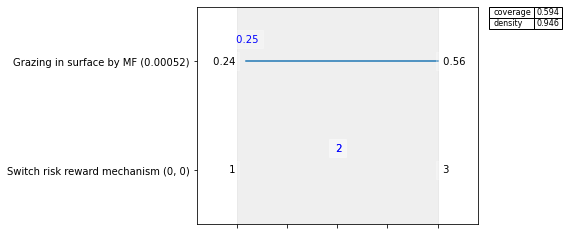

In [32]:
box1.inspect(3)
box1.inspect(3, style='graph')
plt.savefig("./Figures/prim_box_inspect_vm.png")
plt.show()

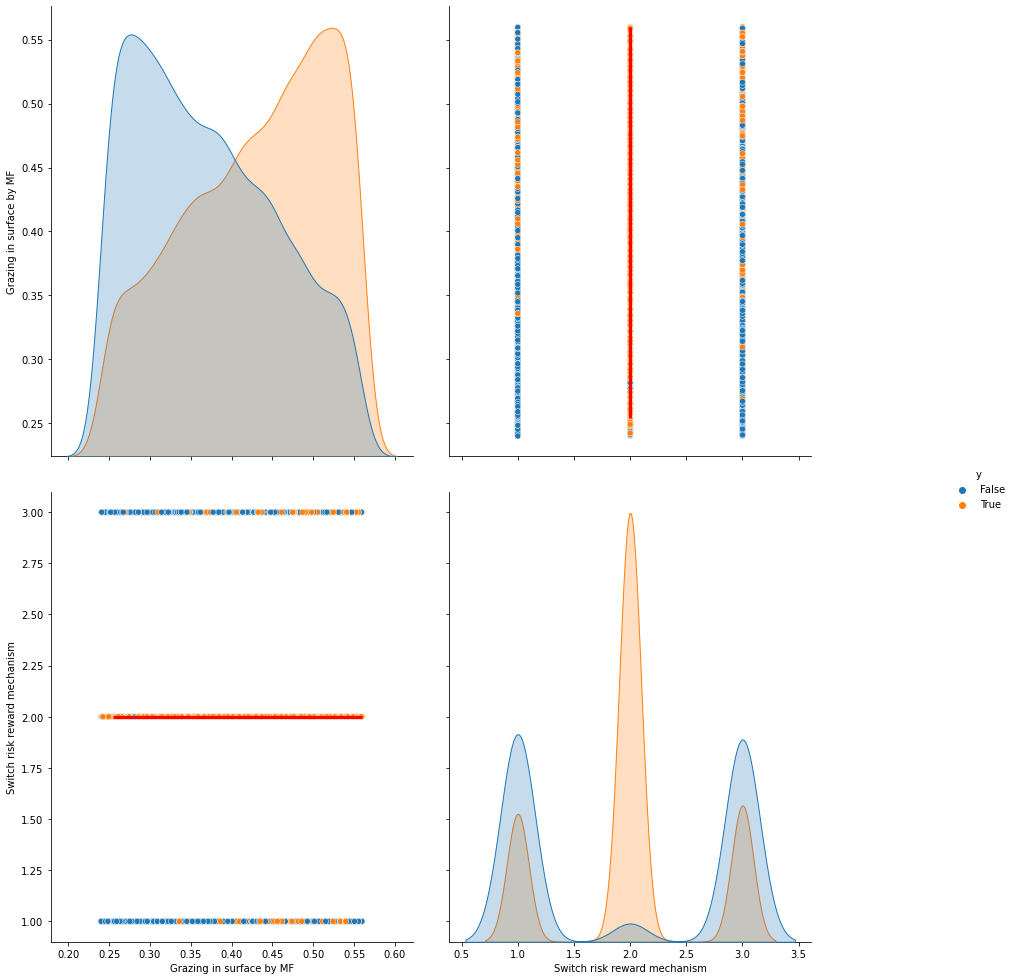

In [33]:

box1.select(3) 
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.savefig('./Figures/step_4_scatter_plot_vm.png')
plt.show()

C:\Users\irene\anaconda3\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


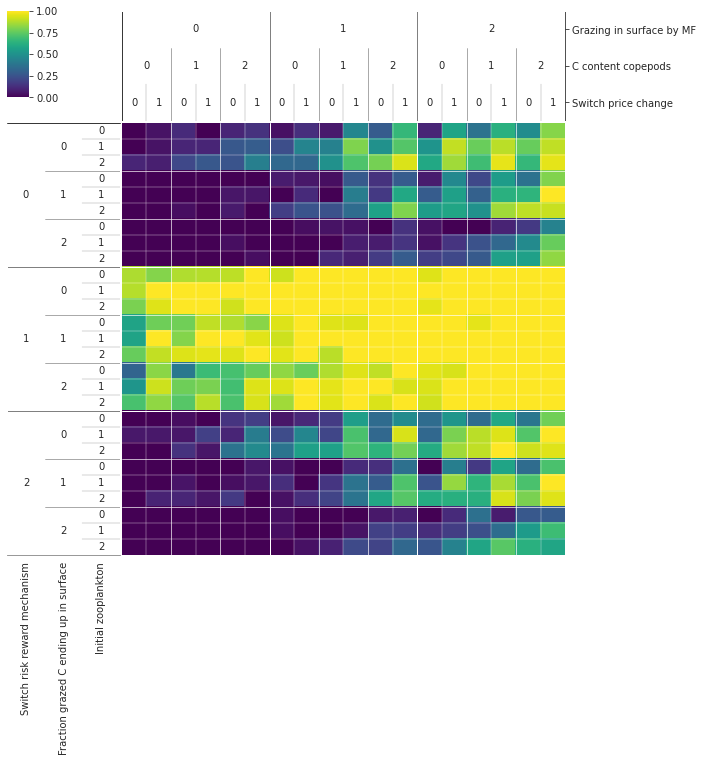

In [34]:
dimensional_stacking.create_pivot_plot(experiments, y) 
plt.savefig('./Figures/step_4_dmn_stack_vm.png')
plt.show()